In [2]:
import brax
from matplotlib.lines import Line2D
from matplotlib.patches import Circle
import matplotlib.pyplot as plt

#@title A bouncy ball scene
bouncy_ball = brax.Config(dt=0.05, substeps=20, dynamics_mode='pbd')

# ground is a frozen (immovable) infinite plane
ground = bouncy_ball.bodies.add(name='ground')
ground.frozen.all = True
plane = ground.colliders.add().plane
plane.SetInParent()  # for setting an empty oneof

# ball weighs 1kg, has equal rotational inertia along all axes, is 1m long, and
# has an initial rotation of identity (w=1,x=0,y=0,z=0) quaternion
ball = bouncy_ball.bodies.add(name='ball', mass=1)
cap = ball.colliders.add().capsule
cap.radius, cap.length = 0.5, 1

# gravity is -9.8 m/s^2 in z dimension
bouncy_ball.gravity.z = -9.8

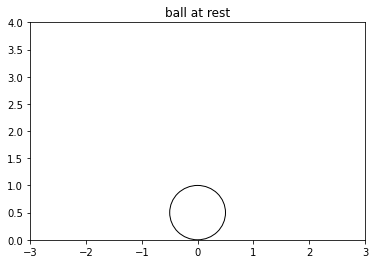

In [3]:
def draw_system(ax, pos, alpha=1):
  for i, p in enumerate(pos):
    ax.add_patch(Circle(xy=(p[0], p[2]), radius=cap.radius, fill=False, color=(0, 0, 0, alpha)))
    if i < len(pos) - 1:
      pn = pos[i + 1]
      ax.add_line(Line2D([p[0], pn[0]], [p[2], pn[2]], color=(1, 0, 0, alpha)))

_, ax = plt.subplots()
plt.xlim([-3, 3])
plt.ylim([0, 4])

draw_system(ax, [[0, 0, 0.5]])
plt.title('ball at rest')
plt.show()